<style>
/* Inline CSS zum Ändern der Schriftgröße in Jupyter Notebook */
body {
    font-size: 16px; /* Standardtextgröße */
}

h1 {
    font-size: 28px; /* Überschrift 1 Größe */
}

h2 {
    font-size: 24px; /* Überschrift 2 Größe */
}

h3 {
    font-size: 20px; /* Überschrift 3 Größe */
}
</style>

# What causes lung cancer?
Dataset originated from [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer?resource=download)

Based on data of 309 individuals the aim is to find correlation and causes for lung cancer. The following features are included in the data set:
- gender
- age
- smoking
- yellow_fingers
- anxiety
- peer_pressure
- chronic disease
- fatigue
- allergy
- wheezing
- alcohol consuming
- coughing
- shortness of breath
- swallowing difficulty
- chest pain

## Strategy for the project: 
- EDA
- Data Analysis
- Data Visualisation
- Machine Learning Models
- Story Telling






In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [3]:
import warnings
# Deactivate Warnings for 'FutureWarning' Klasse
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set option 'use_inf_as_na' to False
pd.set_option('use_inf_as_na', False)

### Preparation of dataframe

In [5]:
# Path to the zip file
zip_file_path = 'lung_cancer_kaggle.zip'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('data_lung_cancer')  # Extract the contents to a folder

# Load the data from the extracted files using pandas
data = pd.read_csv('data_lung_cancer/survey lung cancer.csv')  # Replace 'your_data_file.csv' with the actual file name
#rename columns to lower case
new_cols = []
for col in list(data.columns):
    new_cols.append(col.lower())
data.columns = new_cols
#show dataframe, Dictionary: 1 = NO, 2 = YES
data.head()


,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
def label_encoder(first, second, first_sub, second_sub, col_name, df):
    """
    Converts two values in a column of a dataframe into two different values for label encoding.
    
    first, second, first_sub, second_sub (str, int, float): Given values and values to substitute with

    return (dataframe): returns altered dataframe
    """
    df[col_name] = df[col_name].replace({first: first_sub})
    df[col_name] = df[col_name].replace({second: second_sub})
    
    
    return df
    
    


In [7]:
#encode 0 = M, 1 = F
label_encoder("M", "F", 0,1, "gender", data)
#encode 1 to 0, and 2 to 1 for consistency
for col_name in [cols for cols in list(data.columns) if cols not in ["gender", "age", "lung_cancer"]]:
    label_encoder(1,2,0,1,col_name, data)
#encode NO to 0, YES to 1
label_encoder("NO", "YES", 0,1, "lung_cancer", data)

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,0,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,0,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,0,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


### EDA and Data Visualization


In [9]:
data.describe()
#plausible min and max values

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.475728,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.info()
#no missing values
#correct data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 309 non-null    int64
 1   age                    309 non-null    int64
 2   smoking                309 non-null    int64
 3   yellow_fingers         309 non-null    int64
 4   anxiety                309 non-null    int64
 5   peer_pressure          309 non-null    int64
 6   chronic disease        309 non-null    int64
 7   fatigue                309 non-null    int64
 8   allergy                309 non-null    int64
 9   wheezing               309 non-null    int64
 10  alcohol consuming      309 non-null    int64
 11  coughing               309 non-null    int64
 12  shortness of breath    309 non-null    int64
 13  swallowing difficulty  309 non-null    int64
 14  chest pain             309 non-null    int64
 15  lung_cancer            309 non-null    i

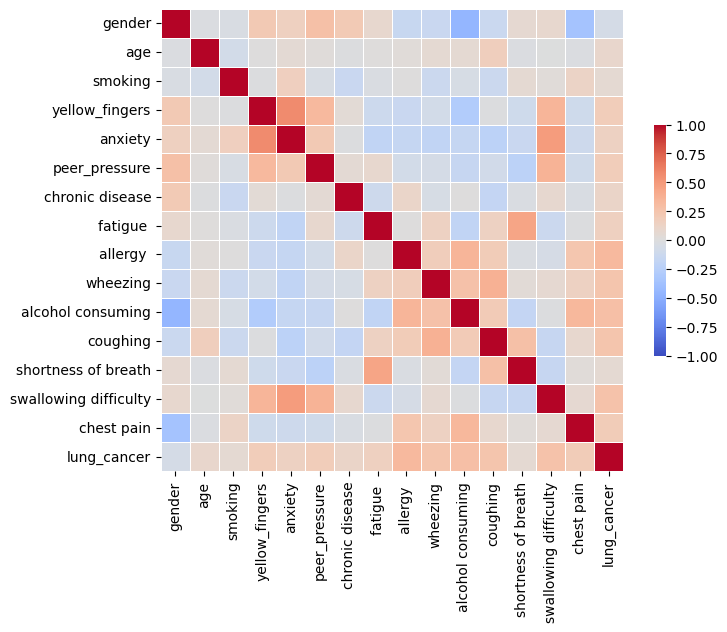

In [11]:
# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin =-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#Note: Important to know would be, how long and how much they actually have been smoking

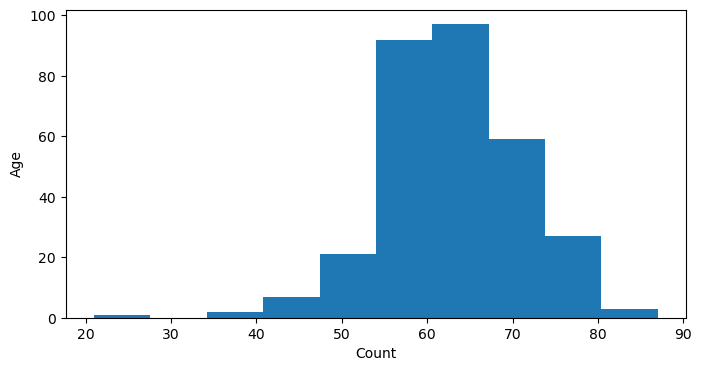

In [12]:
#create bar plot of all columns except age
# for column in (data.columns):
#     if column != "age":
#     # Create a bar plot for the current column
#         plt.figure(figsize= (5,2))  # Create a new figure for each plot
#         data[column].value_counts().plot(kind='bar')
#         plt.title(f'Bar plot for {column}')
#         plt.xlabel(column)
#         plt.ylabel('Count')
#         plt.show()

plt.figure(figsize= (8,4))  # Create a new figure for each plot
data["age"].plot(kind='hist')

plt.xlabel("Count")
plt.ylabel('Age')
plt.show()
#normal distribution. Would be more representative if Age was uniform distribution

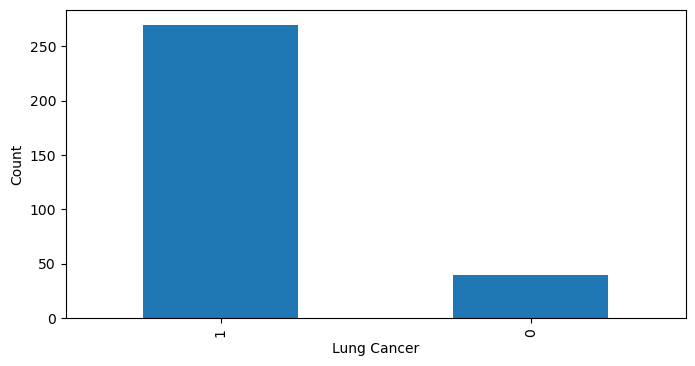

In [13]:
plt.figure(figsize= (8,4))  # Create a new figure for each plot
data["lung_cancer"].value_counts().plot(kind='bar')

plt.xlabel("Lung Cancer")
plt.ylabel('Count')
plt.show()
#Lung Cancer Free is underrepresented. For ML training probelmatic. SMOTE for same sized groups.

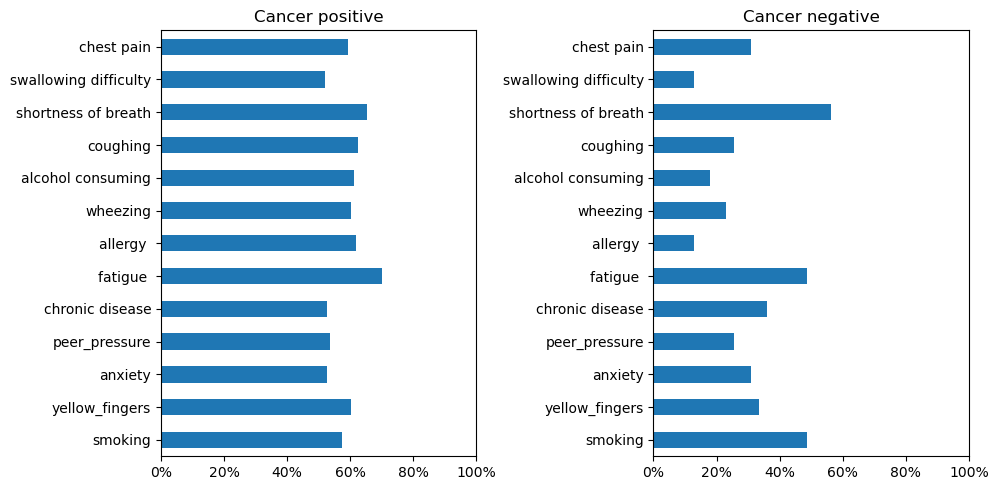

In [14]:
#How many people (in percent) who have lung cancer have/are also ...
data_lung_cancer_positive = data[data["lung_cancer"] ==1]
data_lung_cancer_negative = data[data["lung_cancer"] ==0]

fig, ax = plt.subplots(figsize=(10,5), ncols=2)
data_lung_cancer_positive.describe().T.drop(["age", "gender", "lung_cancer"]).loc[:,"mean"].plot(kind="barh", ax=ax[0])
data_lung_cancer_negative.describe().T.drop(["age", "gender", "lung_cancer"]).loc[:,"mean"].plot(kind="barh", ax=ax[1])

#How much more people suffer from symptoms in the cancer group
cancer_to_no_cancer = data_lung_cancer_positive.describe().T.drop(["age", "gender", "lung_cancer"]).loc[:,"mean"] - data_lung_cancer_negative.describe().T.drop(["age", "gender", "lung_cancer"]).loc[:,"mean"]


ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)

ax[0].set_title("Cancer positive")
ax[1].set_title("Cancer negative")

plt.tight_layout()

for axis in ax:
    axis.xaxis.set_major_formatter(mtick.PercentFormatter(1)) 

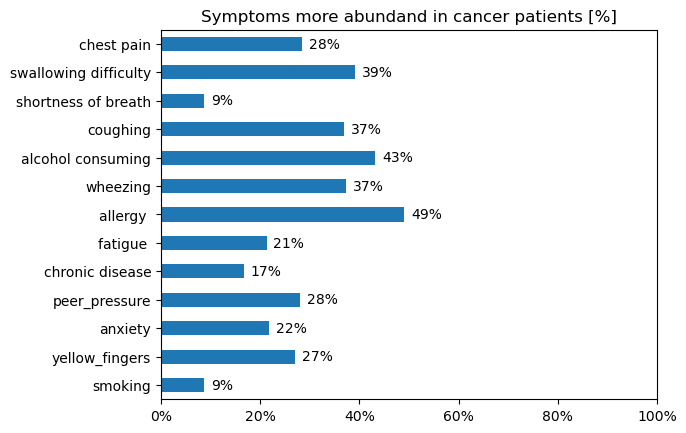

In [15]:
bars = cancer_to_no_cancer.plot(kind="barh", xlim=(0,1))
plt.title("Symptoms more abundand in cancer patients [%]")

for bar in bars.patches:
    plt.annotate(f'{bar.get_width():.0%}',                            
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),  
                 xytext=(5, 0),                                       
                 textcoords='offset points',
                 ha='left', va='center',                              
                 fontsize=10, color='black')

plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1)) 

#Only 9% more smokers in the cancer group
#Cancer patients have 49% more allergies
#43% more alcohol consumers in the cancer group --> indicates a overall less healthy lifestile than the non-cancer group. A unhealthy lifestyle can maybe contribute to cancer formation

### Split Dataset to Train and Test Data

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target
features = data.drop('lung_cancer', axis=1)  
target = data['lung_cancer']  

# Split in Train and Test Data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)
for df in [features_train, features_test, target_train, target_test]:
    print(df.shape)

(216, 15)
(93, 15)
(216,)
(93,)


### SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
#Artificial enlargement of the minority category “no lung cancer”
smotesampler = SMOTE(random_state=42)
features_smote, target_smote = smotesampler.fit_resample(features_train, target_train)
pd.crosstab(index=target_smote, columns="count")

col_0,count
lung_cancer,
0,184
1,184


### Feature Engineering

In [22]:
data["age"]

0      69
1      74
2      59
3      63
4      63
       ..
304    56
305    70
306    58
307    67
308    62
Name: age, Length: 309, dtype: int64

<Axes: xlabel='age'>

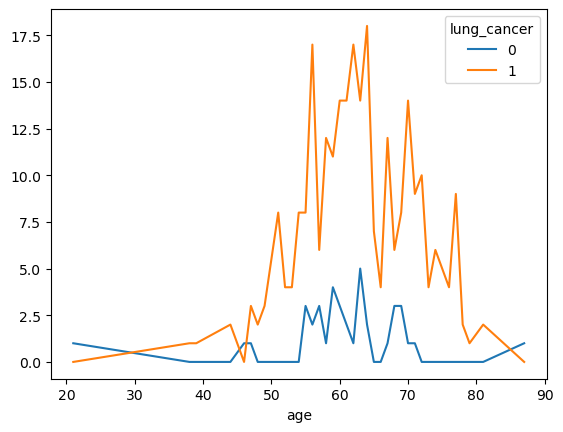

In [23]:
pd.crosstab(index=data["age"], columns=data["lung_cancer"]).plot()

In [24]:
#Group people in 'under 45', 'ages 45-59', 'ages 60-74', '75+'

mask_under_45 = features_train["age"] < 45
mask_45_60 = (features_train["age"] >= 45) & (features_train["age"] < 60)
mask_60_75 = (features_train["age"] >= 60) & (features_train["age"] < 75)
mask_over_75 = features_train["age"] >= 75

conditions = [mask_under_45, mask_45_60, mask_60_75, mask_over_75]
values = ['under 45', 'ages 45-59', 'ages 60-74', '75+']

features_train['age_group'] = np.select(conditions, values, default='Unknown')




In [25]:
features_train["age_group"].value_counts()

age_group
ages 60-74    129
ages 45-59     71
75+            13
under 45        3
Name: count, dtype: int64

### One-Hot-Encoder

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Initialize ColumnTransformer
columns = ['age_group']
encoder = ColumnTransformer([("OHE", ohe, columns)], remainder="passthrough")

# Fit encoder to training data
encoder.fit(features_train)

# Get feature names for one-hot encoded features
ohe_names = encoder.named_transformers_["OHE"].get_feature_names_out(columns)
# Get names of remaining features
remaining_names = [name for name in features_train.columns if name not in columns]

# Combine new column names
all_names = list(ohe_names) + remaining_names

# Transform the training data
features_train_transformed = encoder.transform(features_train)

# Create a DataFrame with the new column names
features_train_ohe = pd.DataFrame(features_train_transformed, columns=all_names)

features_train_ohe.head()



,age_group_75+,age_group_ages 45-59,age_group_ages 60-74,age_group_under 45,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain
0,0.0,0.0,1.0,0.0,0.0,62.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,51.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,48.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,61.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


In [69]:
# Compute the correlation matrix
df_train = features_train_ohe.copy()
df_train["lung_cancer"] = target_train
corr = df_train.corr()

corr["lung_cancer"]
#correlation age under 45, underrep. group (3 Members), age, swallowing difficulty

age_group_75+           -0.061111
age_group_ages 45-59    -0.030493
age_group_ages 60-74     0.090622
age_group_under 45      -0.192046
gender                  -0.048533
age                      0.104016
smoking                  0.014883
yellow_fingers          -0.050484
anxiety                  0.001031
peer_pressure           -0.082189
chronic disease         -0.048533
fatigue                 -0.085109
allergy                 -0.026848
wheezing                -0.026848
alcohol consuming       -0.020932
coughing                -0.023238
shortness of breath     -0.007530
swallowing difficulty   -0.148451
chest pain               0.060546
lung_cancer              1.000000
Name: lung_cancer, dtype: float64

In [75]:
features_train.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'age_group'],
      dtype='object')

## Machine Learning Modelle

### Descision Tree - most important features

In [87]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight = "balanced", max_depth = 4, random_state = 42)
model.fit(features_train_ohe, target_train)
model.feature_importances_
feature_importance = pd.Series(data = model.feature_importances_, index= features_train_ohe.columns)
feature_importance = feature_importance.sort_values(ascending = False)
feature_importance
#most important features: allergy, fatique, swallowing difficulty, alcohol consuming

allergy                  3.559481e-01
fatigue                  1.760932e-01
swallowing difficulty    1.747988e-01
alcohol consuming        1.569330e-01
age_group_ages 45-59     5.459314e-02
yellow_fingers           4.046653e-02
age                      2.165419e-02
coughing                 1.951297e-02
anxiety                  6.600490e-16
age_group_75+            0.000000e+00
shortness of breath      0.000000e+00
wheezing                 0.000000e+00
peer_pressure            0.000000e+00
chronic disease          0.000000e+00
smoking                  0.000000e+00
gender                   0.000000e+00
age_group_under 45       0.000000e+00
age_group_ages 60-74     0.000000e+00
chest pain               0.000000e+00
dtype: float64

In [ ]:
#Software mit Abfrage der Symptome und wahrscheinlichkeit für lung cancer